In [2]:
#import necessary libraries
!pip install kaggle
import zipfile
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#download dataset from kaggle
!kaggle datasets download -d muthuj7/weather-dataset


  0%|          | 0.00/2.23M [00:00<?, ?B/s]
 45%|####4     | 1.00M/2.23M [00:01<00:01, 800kB/s]
 90%|########9 | 2.00M/2.23M [00:01<00:00, 1.60MB/s]
100%|##########| 2.23M/2.23M [00:01<00:00, 1.52MB/s]


In [4]:
zipfile = "weather-dataset.zip"

In [9]:
#read the csv file
df = pd.read_csv("weatherHistory.csv")

In [12]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [13]:
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [15]:
#copy the original file
weather = df.copy()

In [16]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [18]:
#check shape of the dataframe
weather.shape

(96453, 12)

In [20]:
#check null values
weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [21]:
weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [24]:
#change the data types
weather['Wind Bearing (degrees)'] = weather['Wind Bearing (degrees)'].astype('int')
weather['Loud Cover'] = weather['Loud Cover'].astype('int')
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'])

In [27]:
#remove null values
weather['Precip Type'].fillna(weather['Precip Type'].value_counts().index[0], inplace = True)

In [28]:
weather.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [35]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### Exploratory data analysis

#### TOP 10 WEATHERS

In [45]:
weather_eda = weather['Summary'].value_counts().reset_index()
weather_eda.columns = ['Weather', 'Summary']
weather_eda.head(10)

,Weather,Summary
0,Partly Cloudy,31733
1,Mostly Cloudy,28094
2,Overcast,16597
3,Clear,10890
4,Foggy,7148
5,Breezy and Overcast,528
6,Breezy and Mostly Cloudy,516
7,Breezy and Partly Cloudy,386
8,Dry and Partly Cloudy,86
9,Windy and Partly Cloudy,67


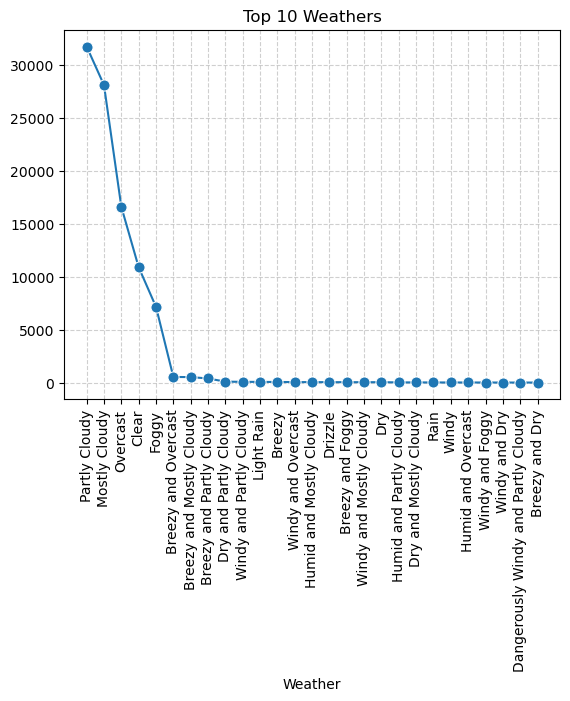

In [55]:
#plotting it on the line graph
plt.xticks(rotation = 90)
sns.lineplot(x = weather_eda['Weather'], y = weather_eda['Summary'], data = weather_eda.head(10), marker='o', linestyle='-', markersize=8)
plt.xlabel('Weather')
plt.ylabel('')
plt.title('Top 10 Weathers')
plt.grid(True, linestyle='--', alpha=0.6)


#### WEATHER V/S TEMPERATURE

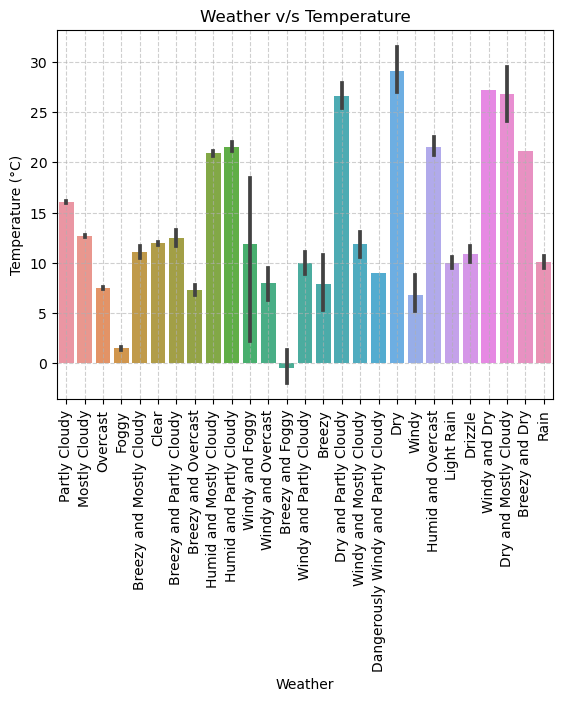

In [58]:
sns.set_palette("pastel")
plt.xticks(rotation = 90)
plt.title('Weather v/s Temperature')
sns.barplot(x=weather['Summary'] , y = weather['Temperature (C)'])
plt.xlabel('Weather')
plt.ylabel('Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.6)

#### WEATHER V/S HUMIDITY

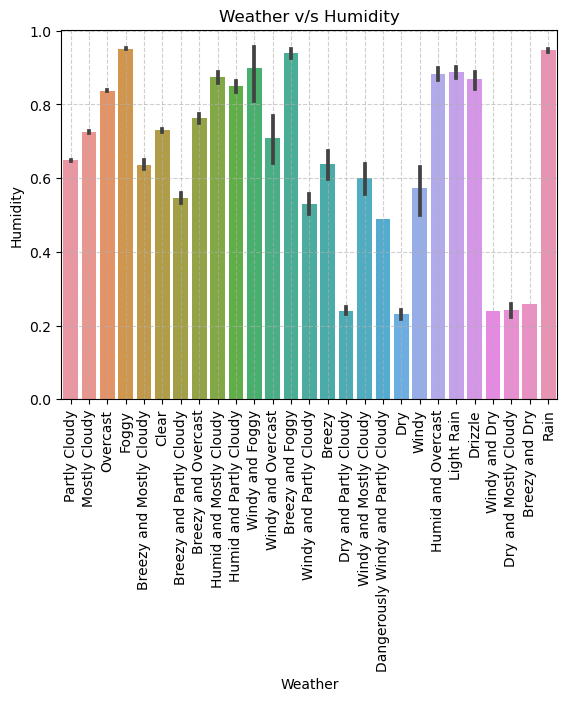

In [59]:
sns.set_palette("pastel")
plt.xticks(rotation = 90)
plt.title('Weather v/s Humidity')
sns.barplot(x=weather['Summary'] , y = weather['Humidity'])
plt.xlabel('Weather')
plt.ylabel('Humidity')
plt.grid(True, linestyle='--', alpha=0.6)

#### WEATHER V/S PRESSURE

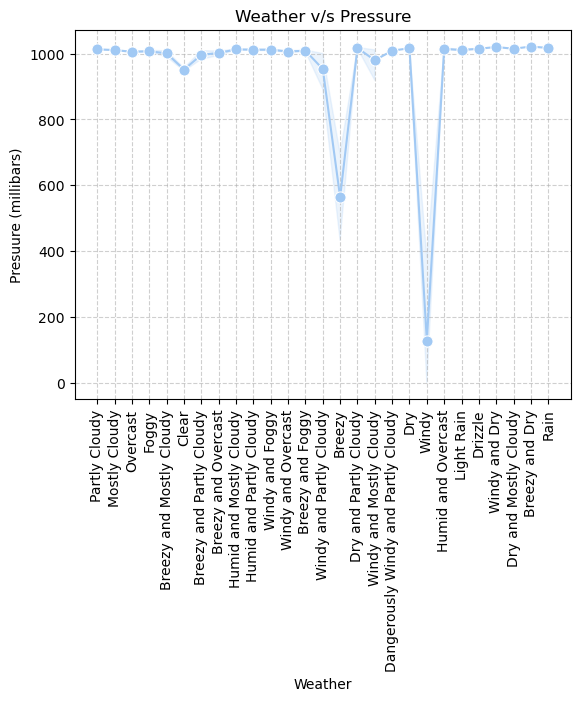

In [62]:
plt.xticks(rotation = 90)
sns.lineplot(x = weather['Summary'], y = weather['Pressure (millibars)'], data = weather, marker='o', linestyle='-', markersize=8)
plt.xlabel('Weather')
plt.ylabel('Presuure (millibars)')
plt.title('Weather v/s Pressure')
plt.grid(True, linestyle='--', alpha=0.6)

#### WEATHER V/S VISIBILITY

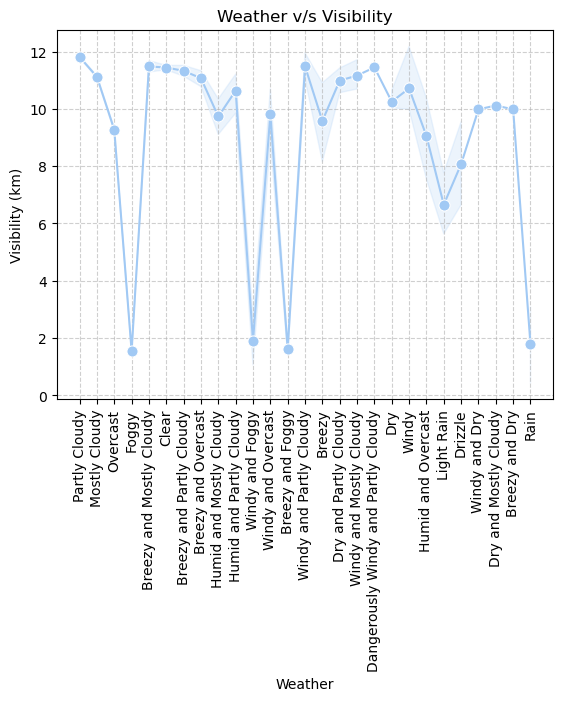

In [63]:
plt.xticks(rotation = 90)
sns.lineplot(x = weather['Summary'], y = weather['Visibility (km)'], data = weather, marker='o', linestyle='-', markersize=8)
plt.xlabel('Weather')
plt.ylabel('Visibility (km)')
plt.title('Weather v/s Visibility')
plt.grid(True, linestyle='--', alpha=0.6)

#### WEATHER V/S WIND SPEED

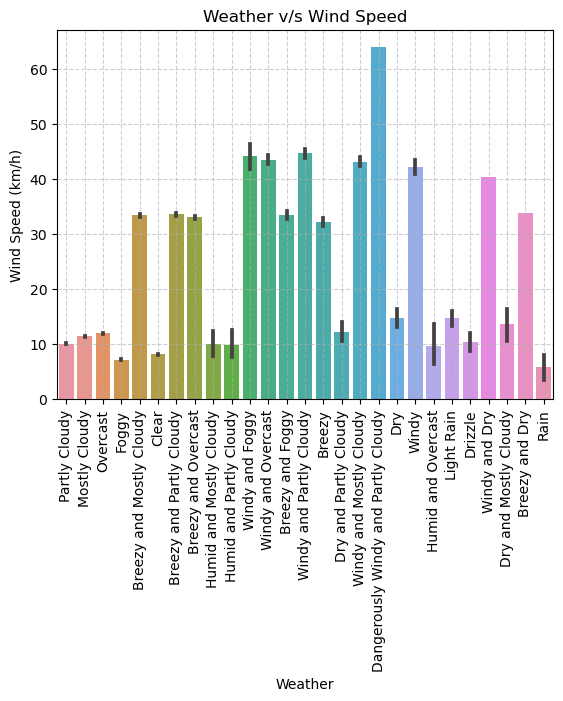

In [70]:
sns.set_palette("Dark2")
plt.xticks(rotation = 90)
plt.title('Weather v/s Wind Speed')
sns.barplot(x=weather['Summary'] , y = weather['Wind Speed (km/h)'])
plt.xlabel('Weather')
plt.ylabel('Wind Speed (km/h)')
plt.grid(True, linestyle='--', alpha=0.6)